In [1]:
'''Imports'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline



In [2]:
'''load datasets'''

train_df = pd.read_csv('Datasets/SE_rents2018_train.csv')
test_df = pd.read_csv('Datasets/SE_rents2018_test1.csv')


In [3]:
train_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B


In [4]:
test_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7499437,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,...,0,0,2700,1,"By Owner, No Fees!\n\nNewly renovated building...",Little Italy,Manhattan,1B,1.0,B
1,7477903,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,...,0,0,1650,1,this is a beautiful spacious renovated full s...,Bushwick,Brooklyn,C4,4.0,C
2,7481023,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,...,1,0,2900,0,"Garden level, pet-friendly, 2 bedroom, 1 bath ...",Columbia St Waterfront District,Brooklyn,GARDEN,NaN,NaN
3,7479547,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,...,0,0,4750,1,Ivy Park is a boutique condominium with a uniq...,Upper West Side,Manhattan,2C,2.0,C
4,7518814,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,...,0,0,1800,0,Located across from the New East River Plaza w...,East Harlem,Manhattan,9,NaN,NaN


In [5]:
print(f"Train Data Columns:{list(train_df)}\n")
print(f"Test Data Columns:{list(test_df)}\n")

Train Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']

Test Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_ch

In [6]:
print(f"Train Data Shape Before Drop:{train_df.shape}")
print(f"Test Data Shape Before Drop:{test_df.shape}\n")

# save id columns
train_id = train_df['rental_id']
test_id = test_df['rental_id']

#drop unnecessary columns

train_df.drop(["rental_id","created_at",'description','bin'],axis=1,inplace=True)
test_df.drop(["rental_id","created_at",'description','bin'],axis=1,inplace=True)

print(f"Train Data Shape After Drop: {train_df.shape}")
print(f"Test Data Shape After Drop: {test_df.shape}")

Train Data Shape Before Drop:(12000, 39)
Test Data Shape Before Drop:(2000, 39)

Train Data Shape After Drop: (12000, 35)
Test Data Shape After Drop: (2000, 35)


In [7]:
# Target Variable Description: 'rent'

train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

mu: 3605.76
sigma:2.9e+03


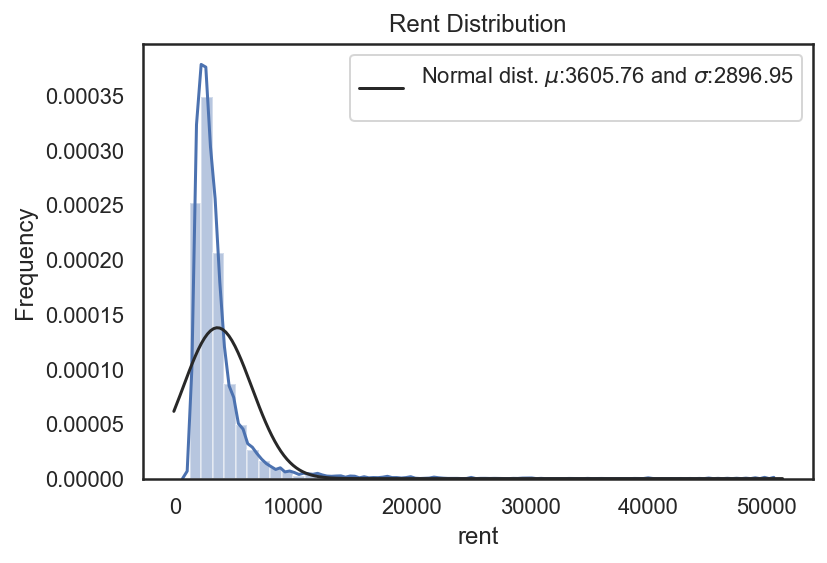

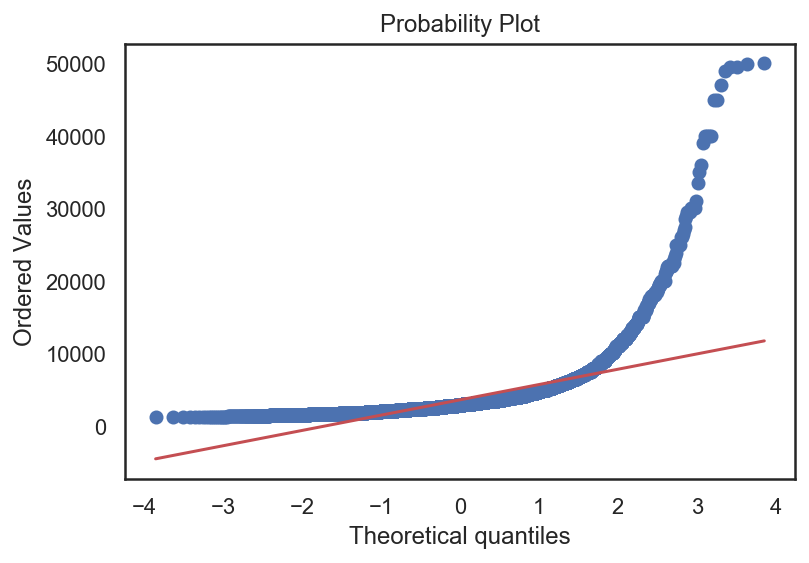

Skewness:6.282718976779915
Kurtosis:64.84190569996547


In [8]:
# Visualize Target Variable

sns.distplot(train_df['rent'], fit=norm)

(mu,sigma)= norm.fit(train_df['rent'])

print(f"mu: {mu:.2f}\nsigma:{sigma:.2}")

plt.legend([f'Normal dist. $\mu$:{mu:.2f} and $\sigma$:{sigma:.2f}\n'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent Distribution')

fig = plt.figure()
res = stats.probplot(train_df['rent'], plot=plt)
plt.show()

print(f"Skewness:{train_df['rent'].skew()}")
print(f"Kurtosis:{train_df['rent'].kurt()}")

Skewness suggest:
-Lack of symmetry in rent distribution
-Mean and median are greater than the mode

Kurtosis suggest:
-Heavy tails in distribution
-Lots of outliers in data

In [9]:
# Categorical Data
train_df.select_dtypes(include=['object']).columns

Index(['addr_unit', 'addr_street', 'addr_city', 'neighborhood', 'borough',
       'unit', 'line'],
      dtype='object')

In [10]:
# Numiercal Data 
train_df.select_dtypes(include=['int64','float64']).columns

Index(['building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'addr_zip',
       'addr_lat', 'addr_lon', 'bbl', 'floor_count', 'year_built',
       'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace',
       'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets',
       'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge',
       'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee',
       'floornumber'],
      dtype='object')

In [11]:
num_categorical = len(train_df.select_dtypes(include=['object']).columns)
num_numerical = len(train_df.select_dtypes(include=['int64','float64']).columns)
print(f"Categorical Features:{num_categorical}\nNumerical Features:{num_numerical}")
print(f"Total Features = {num_categorical+num_numerical}")


Categorical Features:7
Numerical Features:28
Total Features = 35


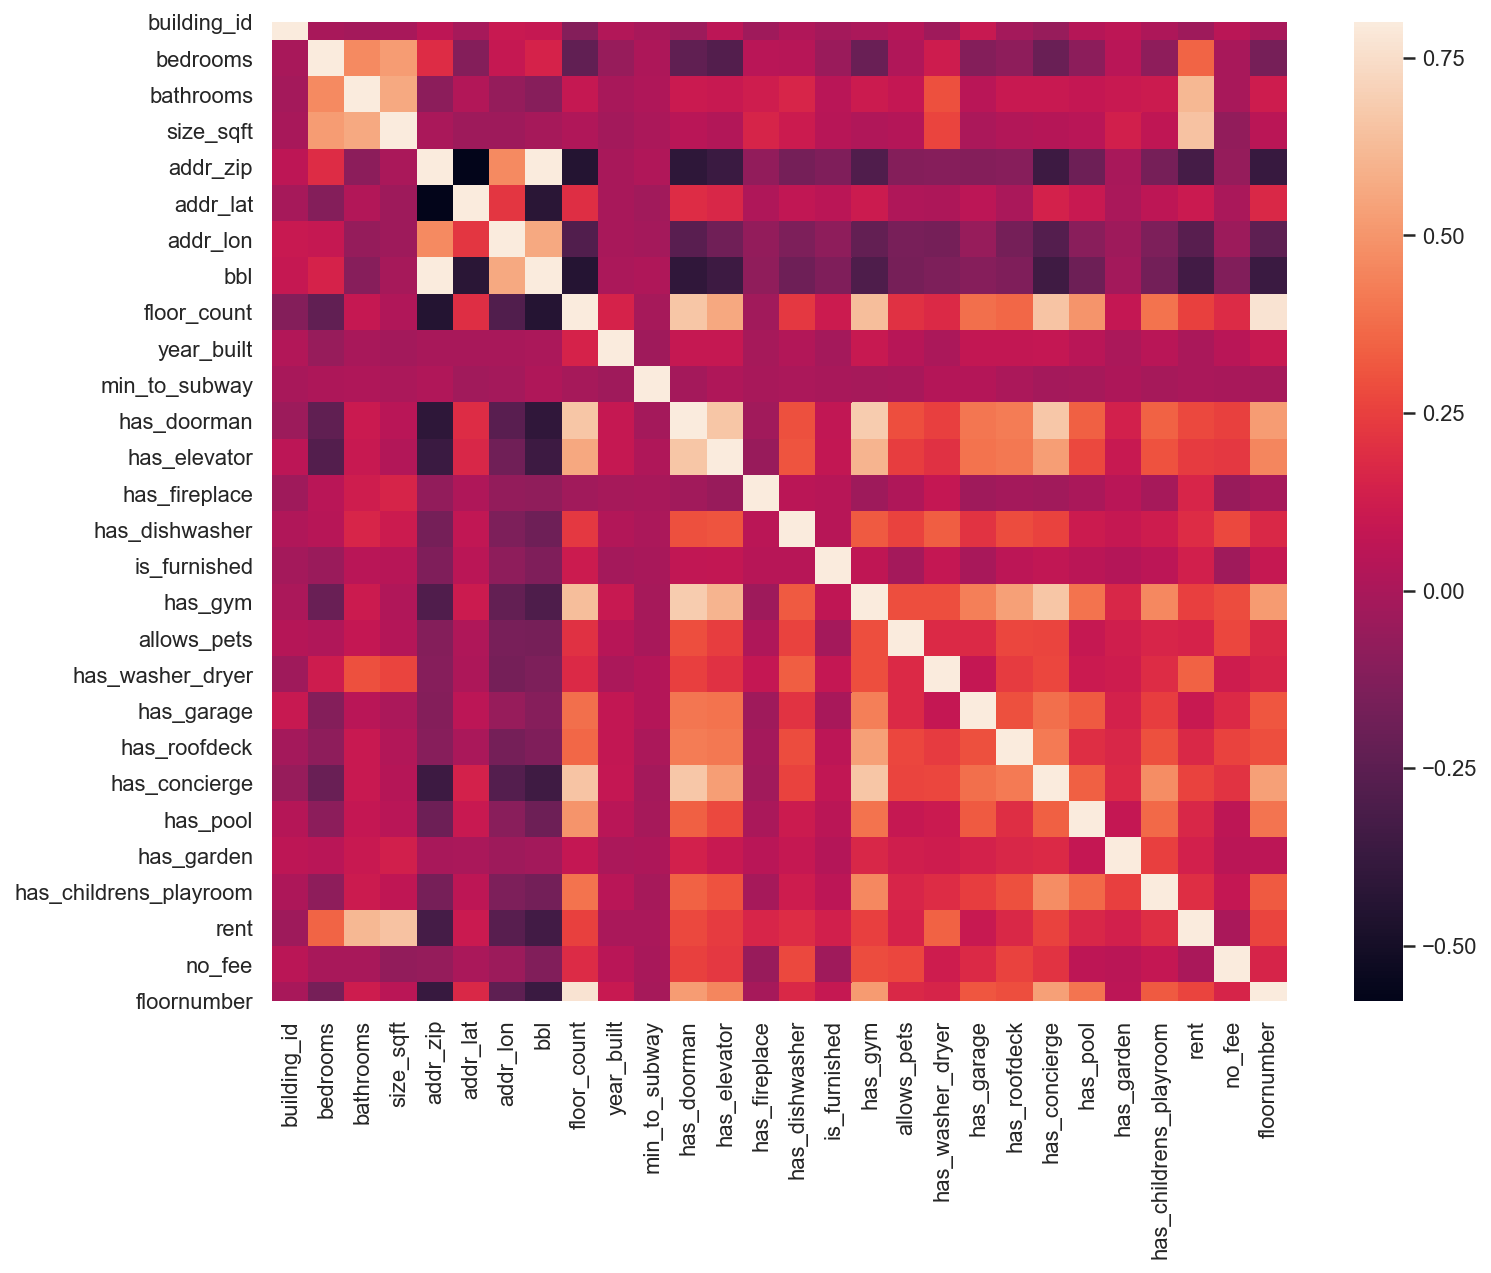

In [12]:
# Correlation Matrix Heatmap

corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

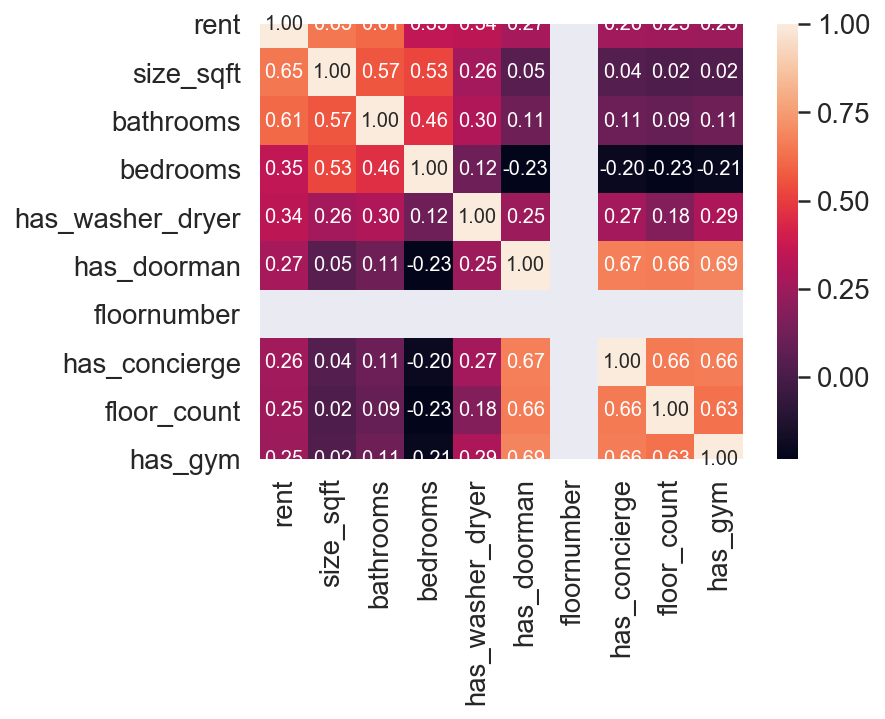

In [13]:
# Top k Heatmap

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rent')['rent'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,rent
1,size_sqft
2,bathrooms
3,bedrooms
4,has_washer_dryer
5,has_doorman
6,floornumber
7,has_concierge
8,floor_count
9,has_gym


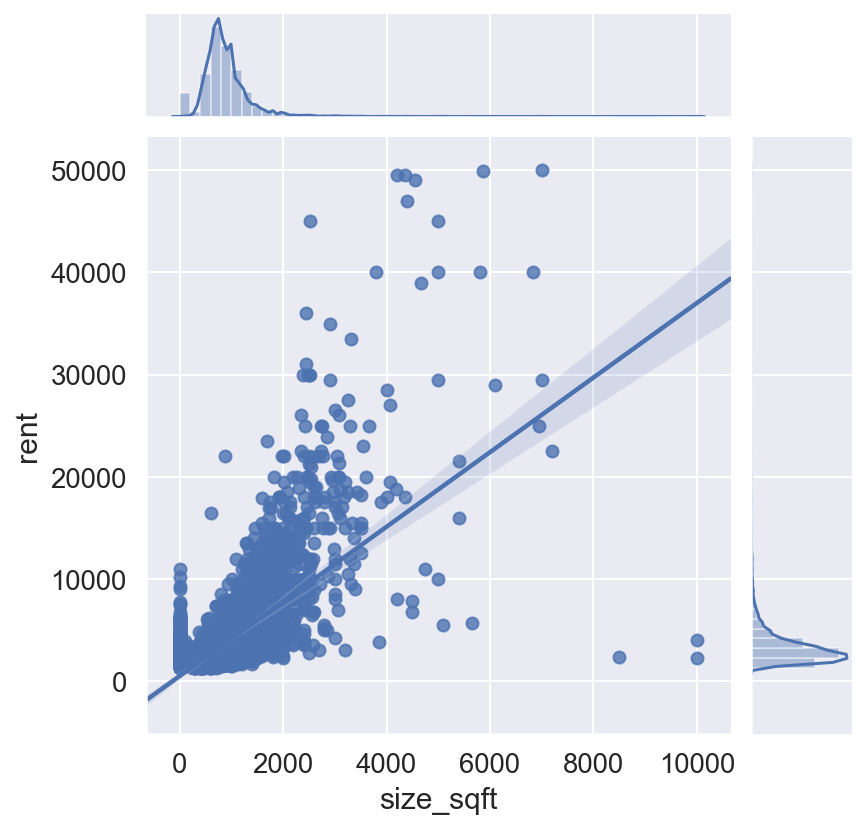

In [15]:
# size_sqft vs rent

sns.jointplot(x=train_df['size_sqft'], y=train_df['rent'], kind='reg')


In [16]:
# Remove outliers

train_df = train_df.drop(train_df[(train_df['size_sqft']>8000) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

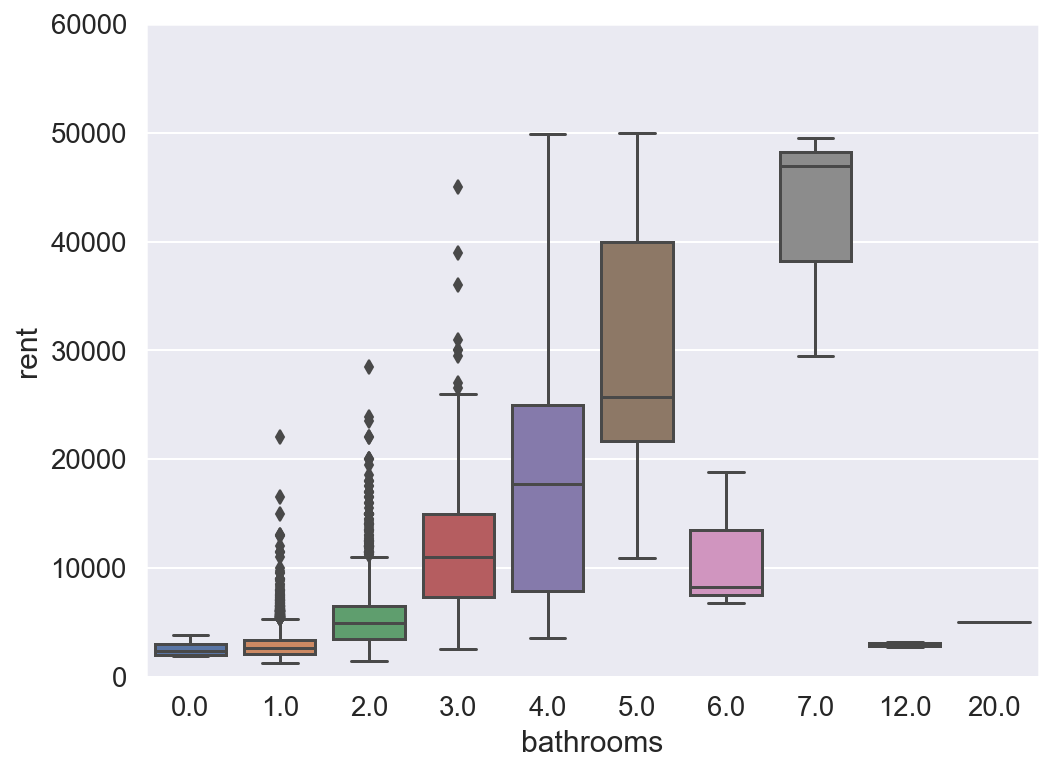

In [17]:
# bathrooms vs rent
var = 'bathrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

In [18]:
# remove bathroom outliers

train_df = train_df.drop(train_df[(train_df['bathrooms']>=12) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bathrooms']==6) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)


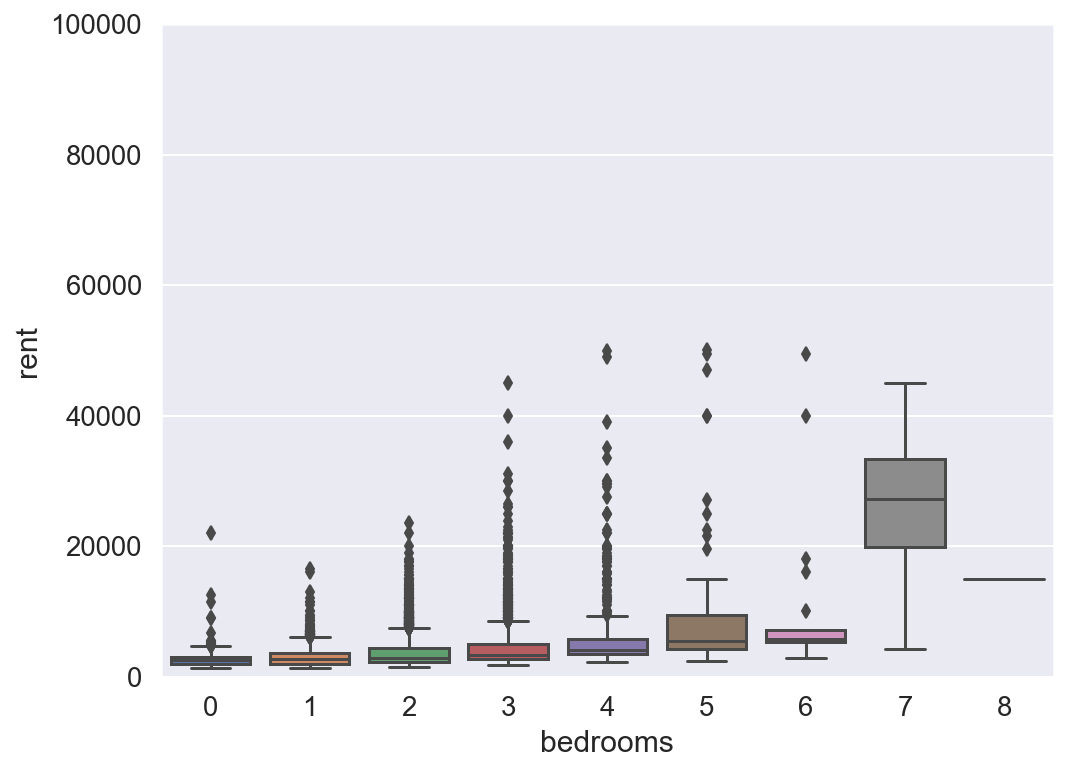

In [19]:
# bedrooms vs rent
var = 'bedrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

In [20]:
# remove bedroom outliers
train_df = train_df.drop(train_df[(train_df['bedrooms']>=8) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bedrooms']==6) 
                         & (train_df['rent']<60000)].index).reset_index(drop=True)

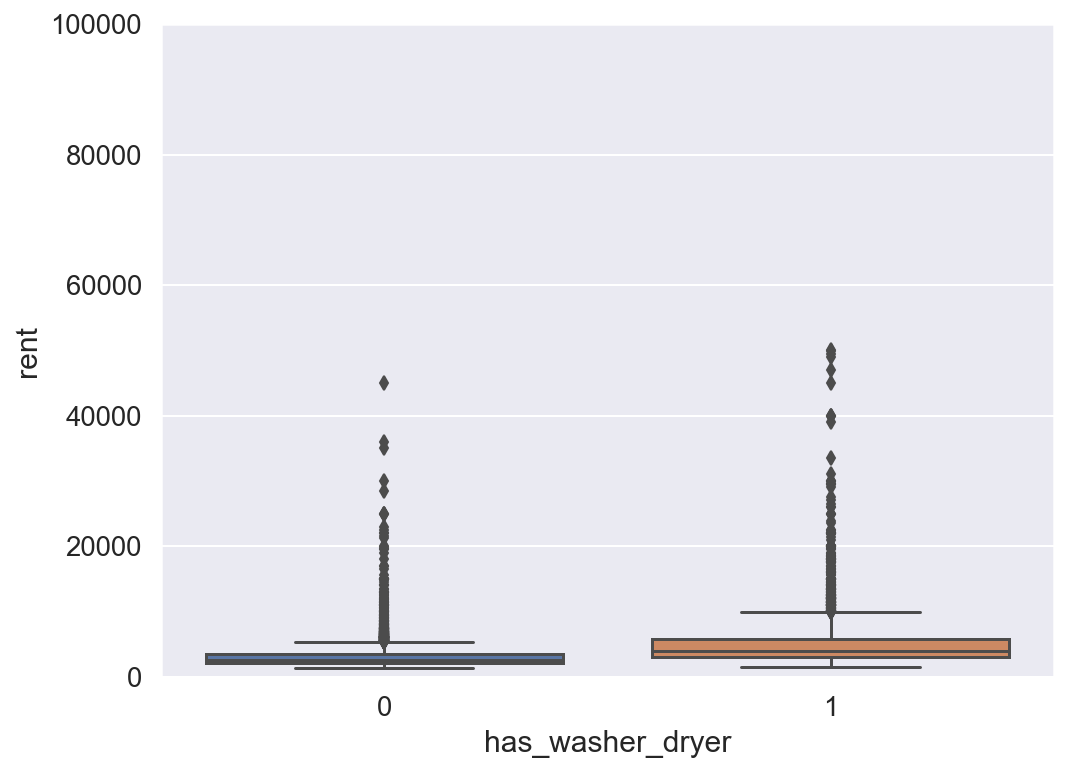

In [21]:
# has_washer_dryer vs rent
var = 'has_washer_dryer'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

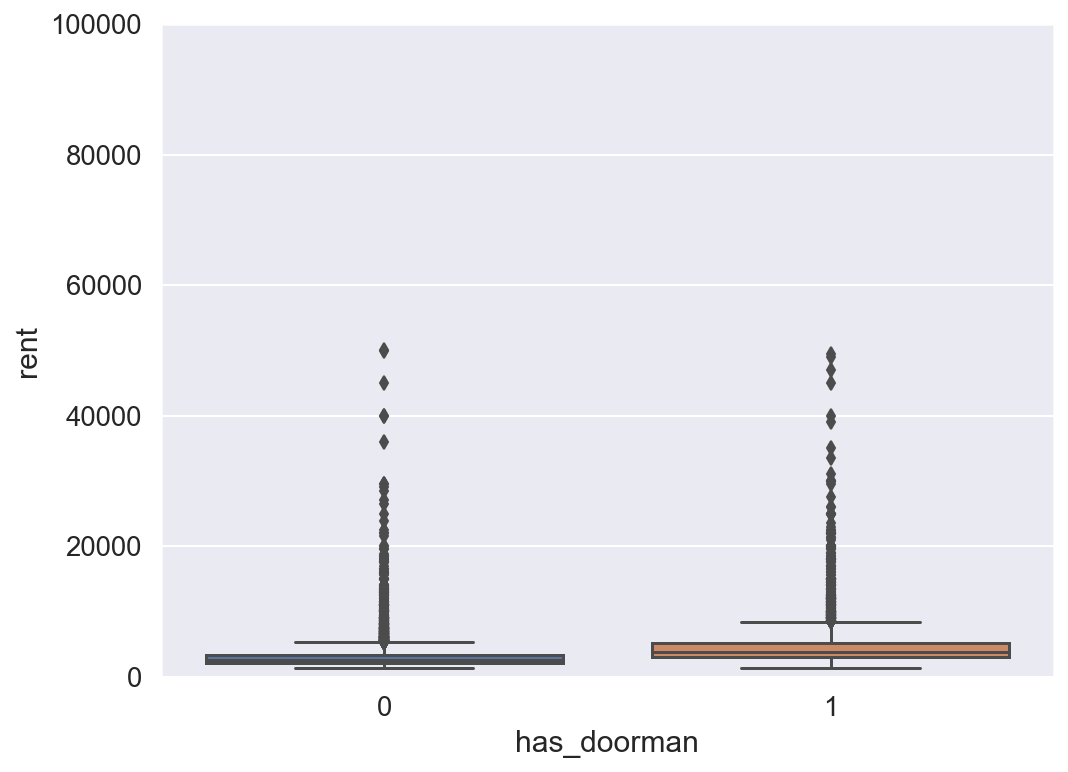

In [22]:
# has_doorman vs rent

var = 'has_doorman'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

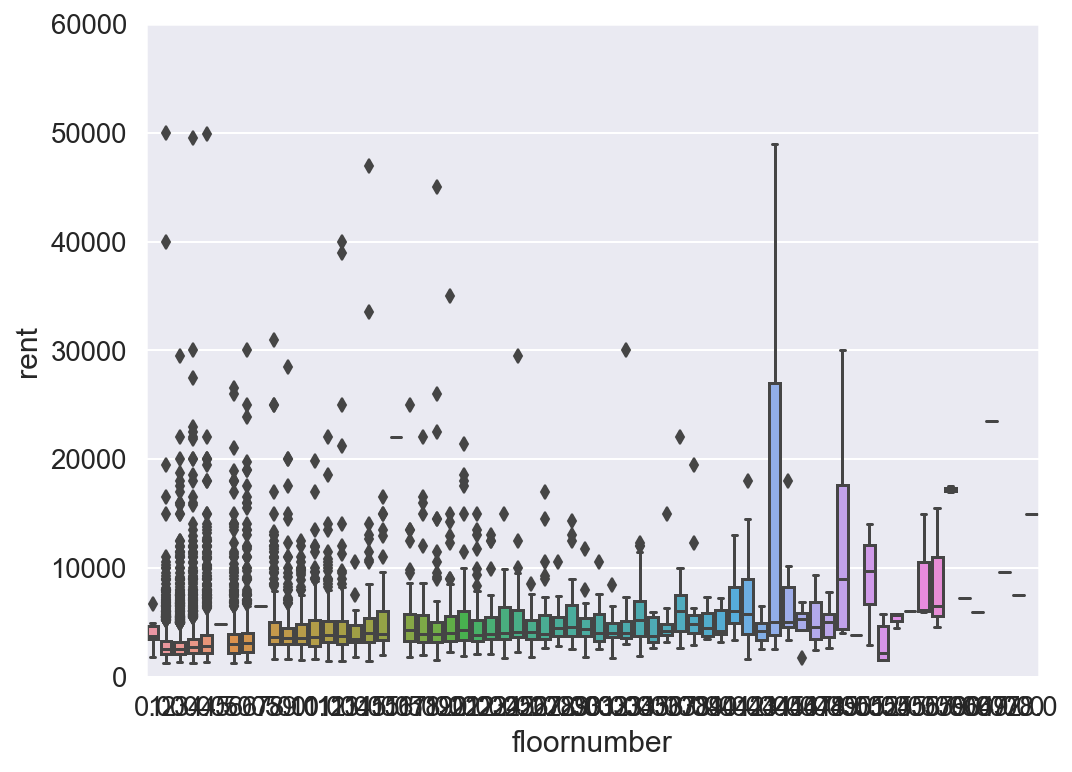

In [23]:
# floornumber vs rent

var = 'floornumber'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

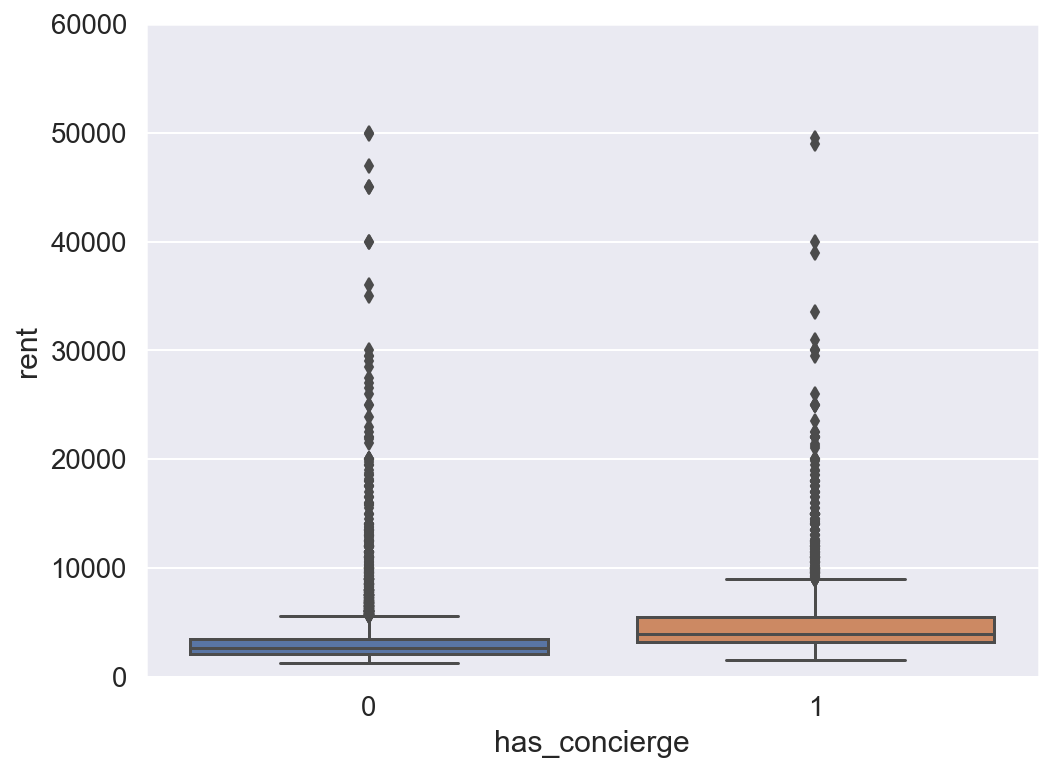

In [24]:
# has_concierge vs rent

var = 'has_concierge'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


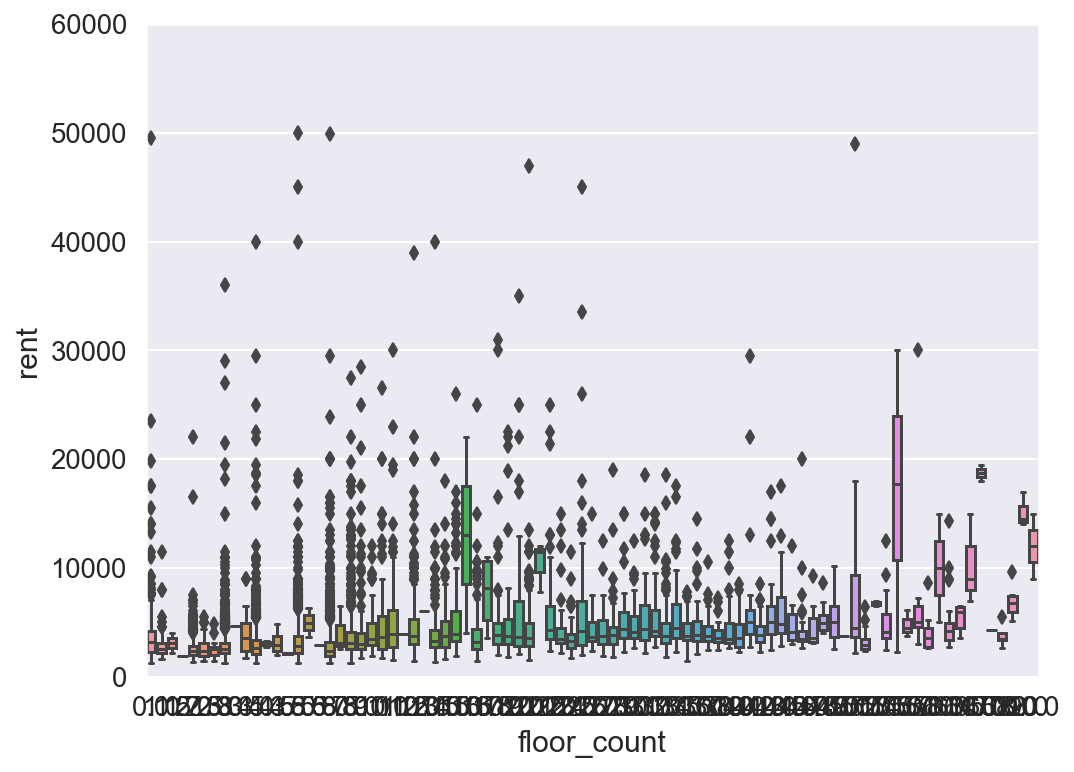

In [25]:
# floor_count vs rent

var = 'floor_count'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


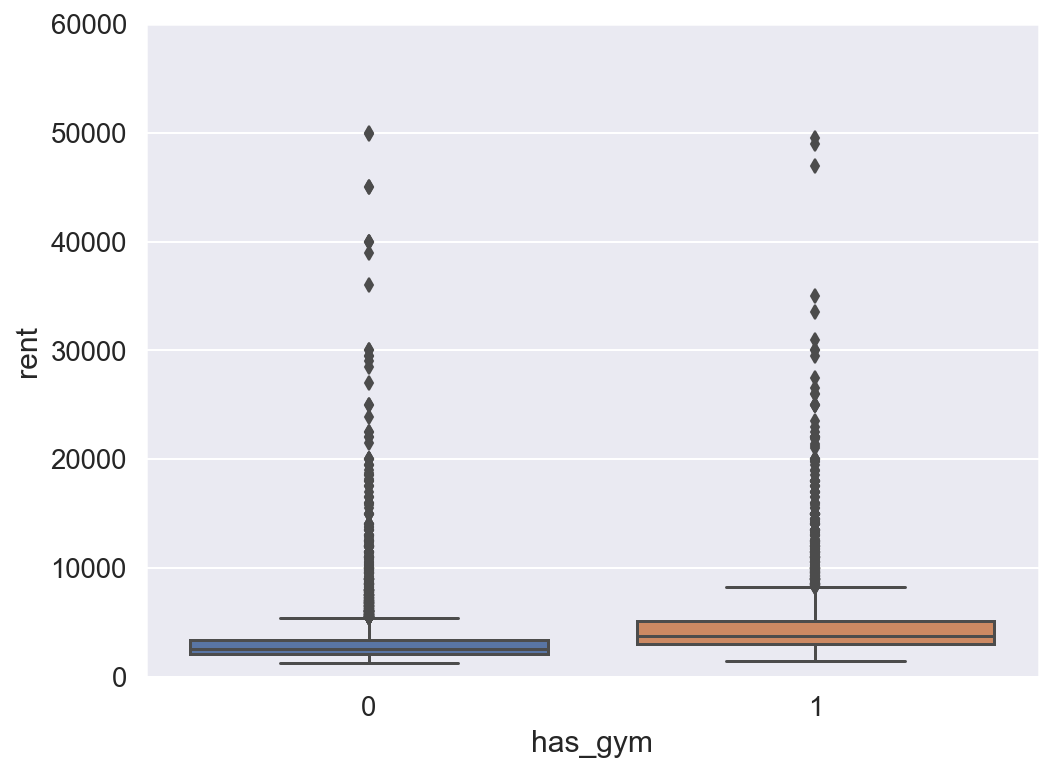

In [26]:
# has_gym vs rent

var = 'has_gym'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

borough
Manhattan        4669.768190
Brooklyn         2954.262399
Queens           2288.724616
Staten Island    2187.692308
Bronx            2162.748634
Name: rent, dtype: float64


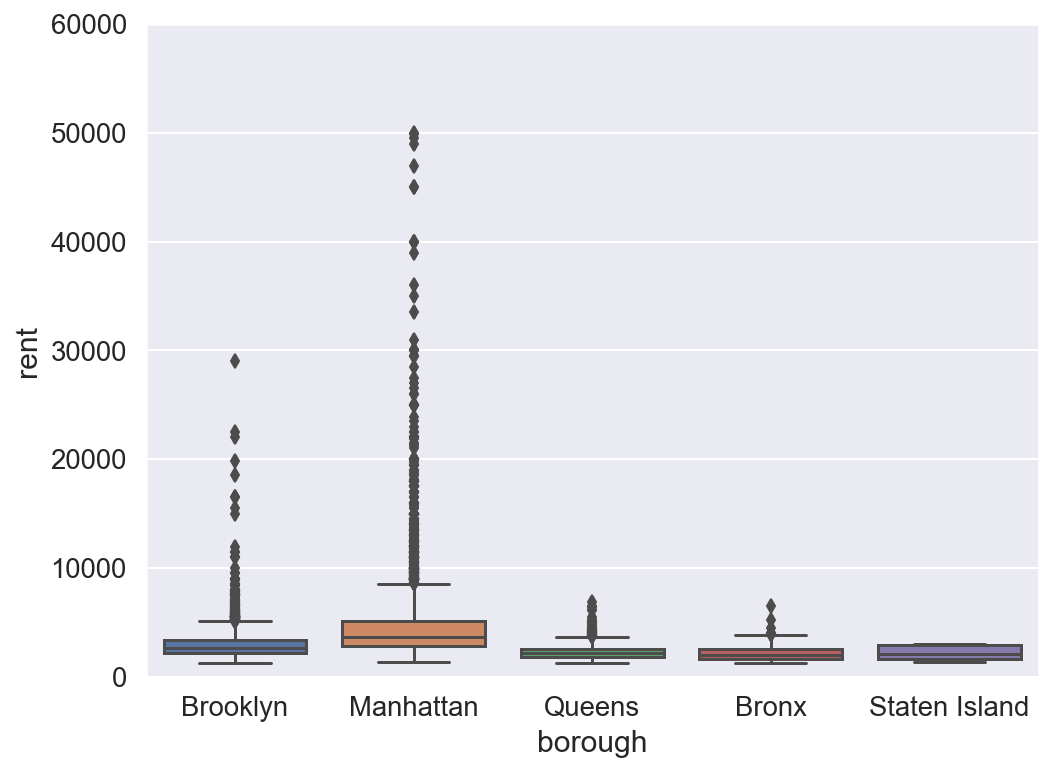

In [27]:
# borough vs rent
var = 'borough'

print(train_df.groupby(var)['rent'].mean().sort_values(ascending=False))

data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);



addr_zip
10461    1350.000000
11421    1414.000000
10452    1423.333333
10469    1450.000000
10460    1450.000000
            ...     
10065    6951.625000
10012    7086.284314
10282    7540.944444
10007    7621.400000
10013    9991.008403
Name: rent, Length: 149, dtype: float64


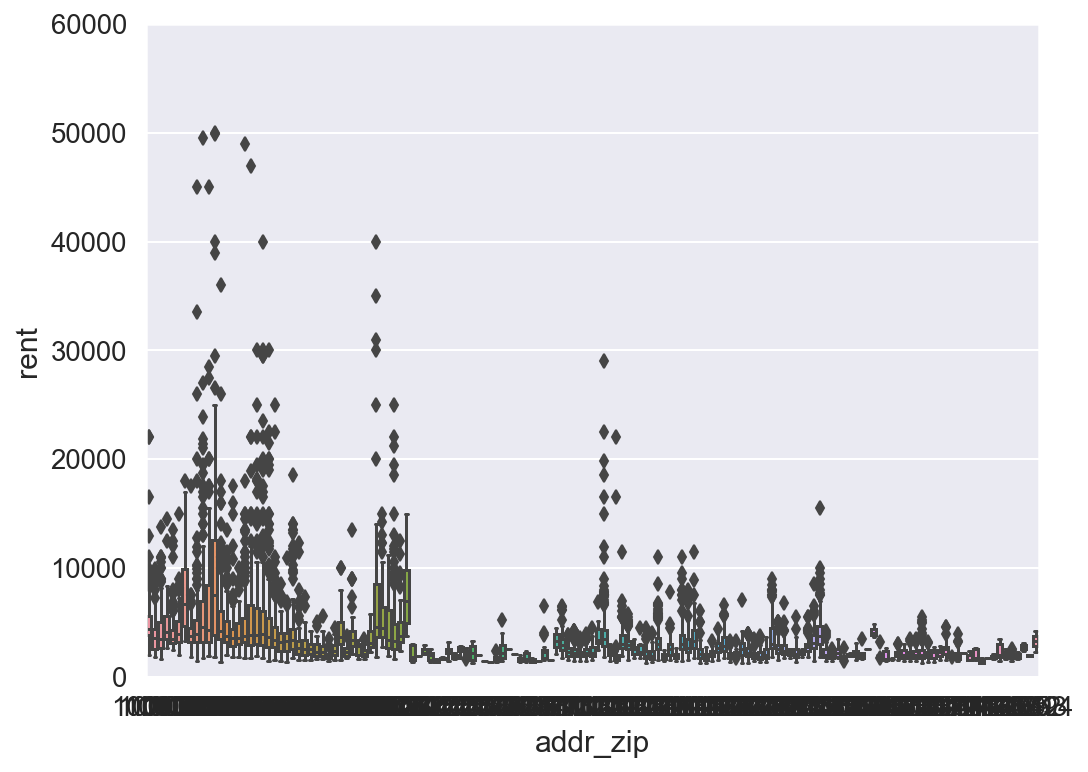

In [28]:
# zipcodes vs rent
var = 'addr_zip'
zip_group = train_df.groupby(var)['rent'].mean().sort_values()
print(zip_group)

zip_group_dic = zip_group.to_dict()

# dictionary with encoded values for zip codes from least to greatest
addr_zip_rank_dic = {key:val for key,val in zip(list(zip_group_dic.keys()),np.arange(0,len(zip_group_dic),1))}

data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

neighborhood
Pelham Bay           1350.000000
Bedford Park         1360.000000
Van Nest             1400.000000
Highbridge           1423.333333
Laconia              1450.000000
                        ...     
Flatiron             6128.088050
Chinatown            6267.428571
Greenwich Village    6645.244898
Soho                 9321.645570
Tribeca              9591.939655
Name: rent, Length: 146, dtype: float64


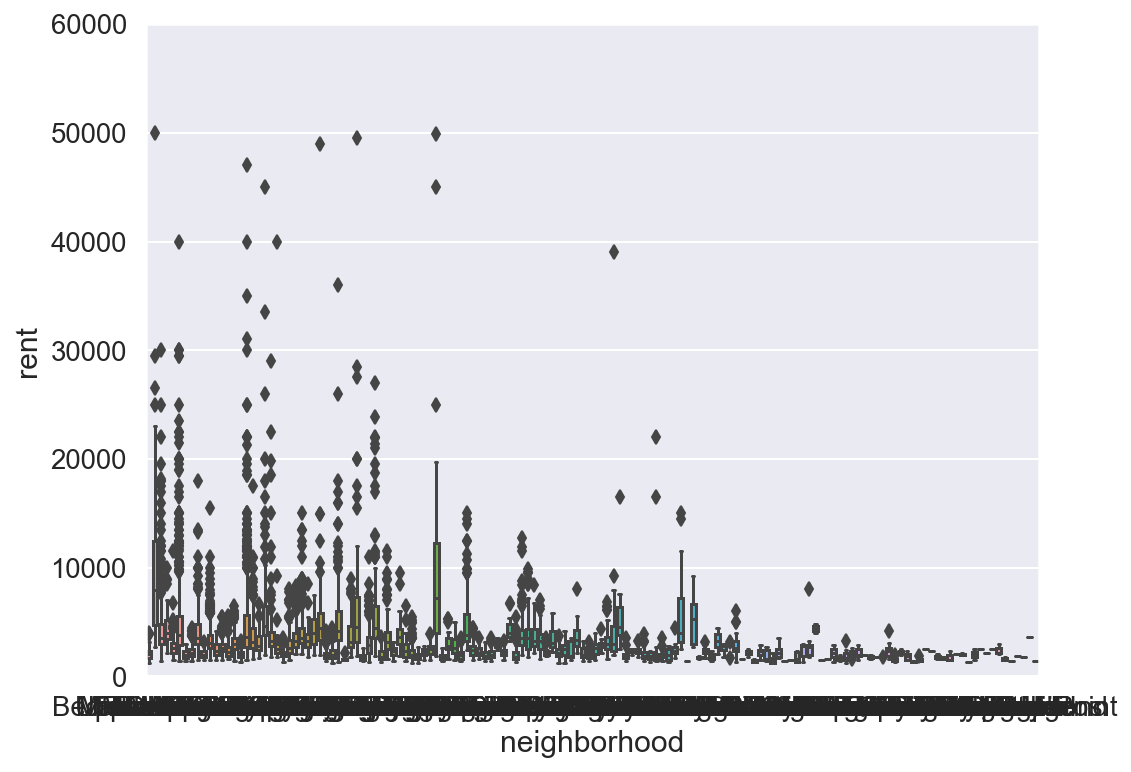

In [29]:
# neighbrhood vs rent
var = 'neighborhood'
neighborhood_group = train_df.groupby(var)['rent'].mean().sort_values()
print(neighborhood_group)

neighborhood_group_dic = neighborhood_group.to_dict()

# dictionary with encoded values for neighborhoods from least to greatest
neighborhood_rank_dic = {key:val for key,val in zip(list(neighborhood_group_dic.keys()),np.arange(0,
                                                                                                  len(neighborhood_group_dic),
                                                                                                  1))}
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);



In [30]:
# Combine Datasets

ntrain_df = train_df.shape[0]
ntest_df = test_df.shape[0]
target_train = train_df.rent.values
target_test = test_df.rent.values
all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data_df.drop(['rent'], axis=1, inplace=True)
print(f"Train data size is : {train_df.shape}")
print(f"Test data size is : {test_df.shape}")
print(f"Combined dataset size is : {all_data_df.shape}")


Train data size is : (11970, 35)
Test data size is : (2000, 35)
Combined dataset size is : (13970, 34)


In [31]:
# size_sqft = 0 to nan

all_data_df.loc[all_data_df['size_sqft']==0,'size_sqft'] = np.nan

In [32]:
# bathrooms = 0 to nan
all_data_df.loc[all_data_df['bathrooms']==0,'bathrooms'] = np.nan

In [33]:
# bedrooms = 0 to nan
all_data_df.loc[all_data_df['bedrooms']==0,'bedrooms'] = np.nan

In [34]:
# Find NaN Ratio of Dataset

all_data_na = (all_data_df.isnull().sum() / len(all_data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
line,29.455977
bedrooms,13.020759
floornumber,10.694345
size_sqft,7.265569
year_built,3.357194
min_to_subway,1.023622
unit,0.780243
addr_unit,0.751611
bathrooms,0.050107
neighborhood,0.021475


Text(0.5, 1.0, 'Percent missing data by feature')

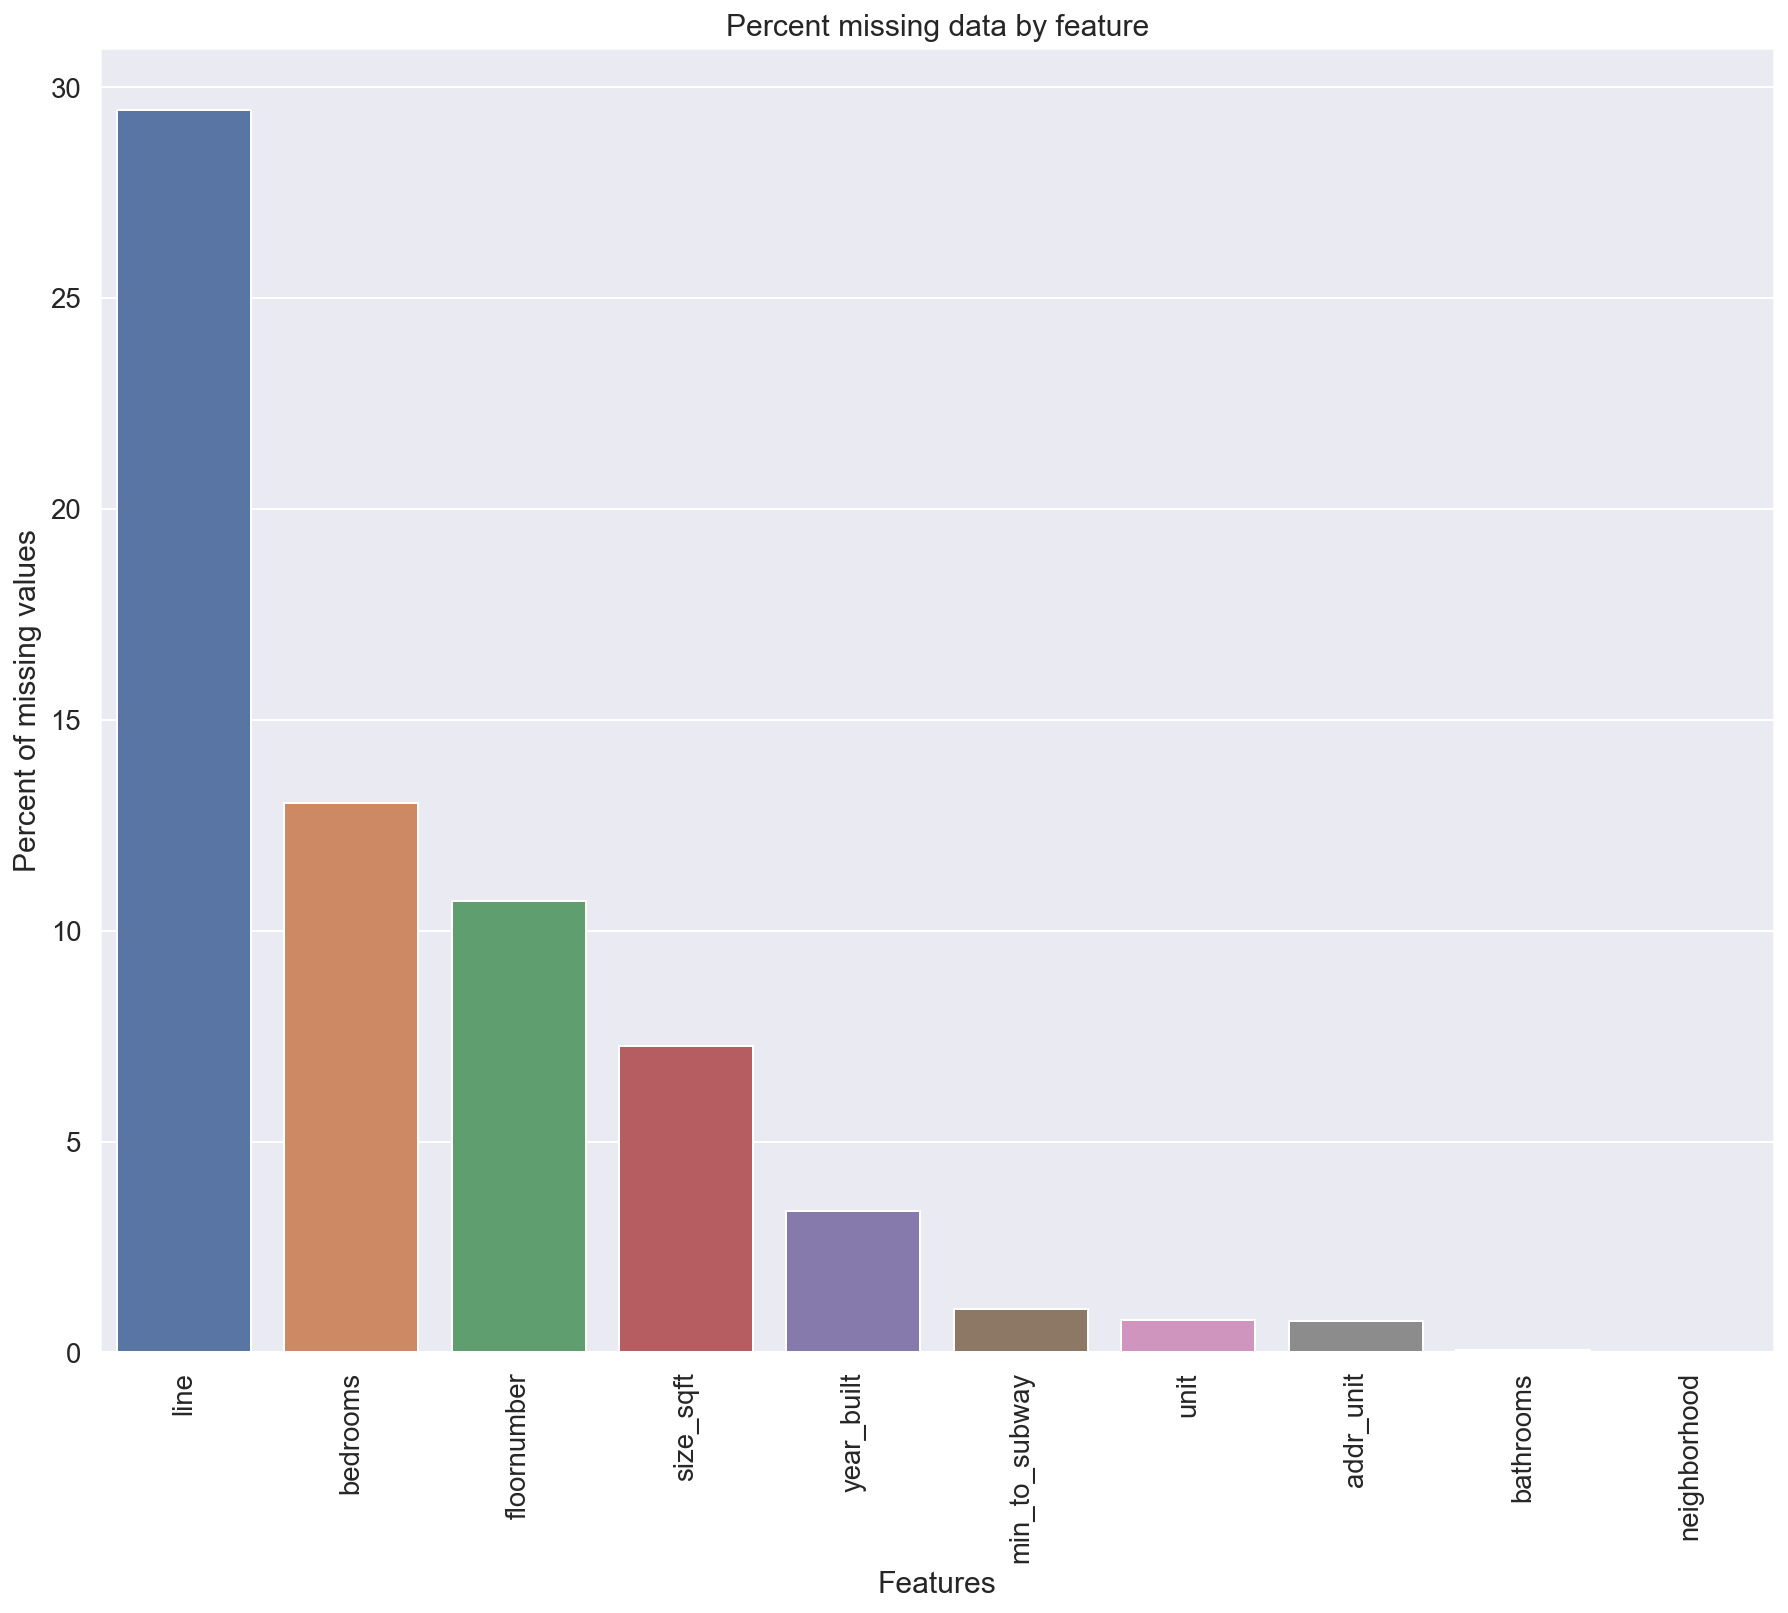

In [35]:
# Percent missing data by feature

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [36]:
# impute missing line values using zipcode and most frequent line in that area
all_data_df['line'] = all_data_df.groupby('addr_zip')['line'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))

#impute missing bedroom values with 1 as they were all 0 before 
all_data_df['bedrooms'].fillna(1,inplace=True)

#impute floornumber missing values with mean floornumber
all_data_df['floornumber'].fillna(all_data_df['floornumber'].mean(),inplace=True)
all_data_df['floornumber'].round(0)

#impute size_sqft missing values with mean size of # of bedrooms
all_data_df['size_sqft'] = all_data_df.groupby('bedrooms')['size_sqft'].transform(lambda x: x.fillna(x.mean()))

#impute year_built missing values with year_built mean of addr_zipcode
all_data_df['year_built'] = all_data_df.groupby('addr_zip')['year_built'].transform(lambda x: x.fillna(x.mean()))

#impute min_to_subway missing values with mean of addr_zipcode
all_data_df['min_to_subway'] = all_data_df.groupby('addr_zip')['min_to_subway'].transform(lambda x: x.fillna(x.mean()))

#left over missing data for min_to_subway, looked online to impute
all_data_df.loc[all_data_df['min_to_subway'].isnull(),'min_to_subway'] = 7  

#impute unit missing values with column mean
all_data_df['unit'].fillna(all_data_df['unit'].mode()[0],inplace=True)

#impute addr_unit missing values with column mean
all_data_df['addr_unit'].fillna(all_data_df['addr_unit'].mode()[0],inplace=True)

#impute bathrooms missing values with 1 as they were 0 before
all_data_df['bathrooms'].fillna(1,inplace=True)

#impute neighborhood missing values with addr_zip mode
all_data_df['neighborhood'] = all_data_df.groupby('addr_zip')['neighborhood'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))



In [37]:
#Check if there are any missing values left

all_data_na = (all_data_df.isnull().sum() / len(all_data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [38]:
# feature transoforming borough

print(all_data_df['borough'].describe())

borough_rank_dic = {"Staten Island": 0,
                   "Bronx":1,
                   "Queens":2,
                   "Brooklyn":3,
                   "Manhattan":4}

all_data_df.groupby('borough').count()

all_data_df['borough_encoded'] = all_data_df['borough'].map(borough_rank_dic)



count         13970
unique            5
top       Manhattan
freq           6207
Name: borough, dtype: object


In [39]:
# feature transforming addr zip

print(all_data_df['addr_zip'].describe())

all_data_df['addr_zip_encoded'] = all_data_df['addr_zip'].map(addr_zip_rank_dic)

all_data_df[all_data_df['addr_zip_encoded'].isnull()]

count    13970.000000
mean     10681.133286
std        592.823268
min      10001.000000
25%      10023.000000
50%      11103.000000
75%      11218.000000
max      11694.000000
Name: addr_zip, dtype: float64


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,addr_lon,...,has_garden,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded
12011,#2,1537258,2.0,1.0,1200.0,13-01 125 STREET,College Point,11356,40.786620,-73.842659,...,0,0,0,College Point,Queens,2,2.00000,0,2,NaN
13471,#2,2303125,3.0,2.0,1868.0,5 COMMERCE STREET,Staten Island,10314,40.613602,-74.168405,...,1,0,0,Graniteville,Staten Island,2,6.19794,0,0,NaN
13860,#2,2350396,2.0,1.0,1150.0,487 CLIFTON AVENUE,Staten Island,10305,40.608569,-74.077173,...,0,0,0,Rosebank,Staten Island,2,2.00000,0,0,NaN


In [40]:
# feature transforming neighborhoods

print(all_data_df['neighborhood'].describe())

all_data_df['neighborhood_encoded'] = all_data_df['neighborhood'].map(neighborhood_rank_dic)

all_data_df.head()

count       13970
unique        151
top       Astoria
freq         1004
Name: neighborhood, dtype: object


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,addr_lon,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
0,#22A,551248,4.0,3.0,1300.0,645 OCEAN AVENUE,Brooklyn,11226,40.646982,-73.960065,...,0,1,Flatbush,Brooklyn,22A,6.19794,B,3,68.0,54.0
1,#406,3373,1.0,1.0,475.0,93 WORTH STREET,New York,10013,40.716599,-74.004799,...,0,0,Tribeca,Manhattan,406,4.00000,06,4,148.0,145.0
2,#18A,70747,3.0,3.0,1886.0,305 EAST 51 STREET,New York,10022,40.755402,-73.967598,...,0,0,Midtown East,Manhattan,18A,18.00000,A,4,142.0,127.0
3,#23E,42076,1.0,1.0,827.0,70 WEST 37TH STREET,New York,10018,40.751301,-73.986298,...,0,1,Midtown South,Manhattan,23E,23.00000,E,4,125.0,129.0
4,#3B,319156,3.0,1.0,1200.0,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,-73.944678,...,0,1,Bedford-Stuyvesant,Brooklyn,3B,3.00000,B,3,98.0,95.0



 mu = 8.04 and sigma = 0.48



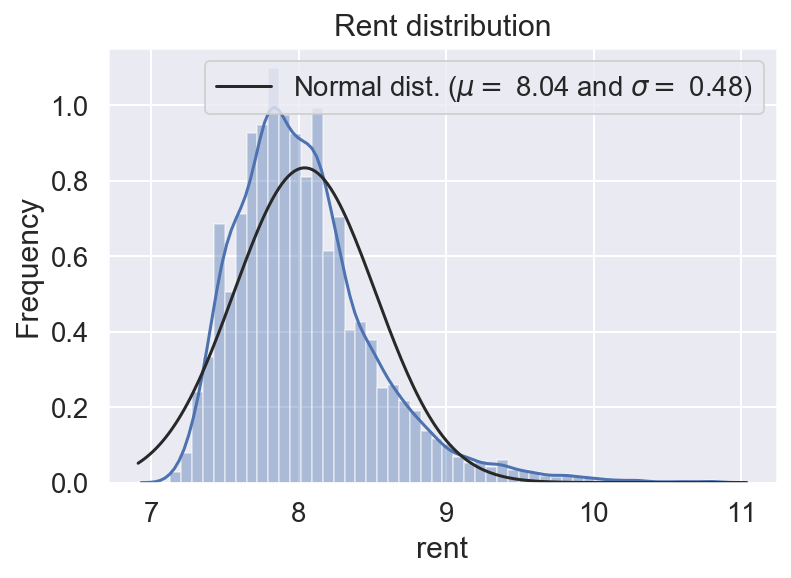

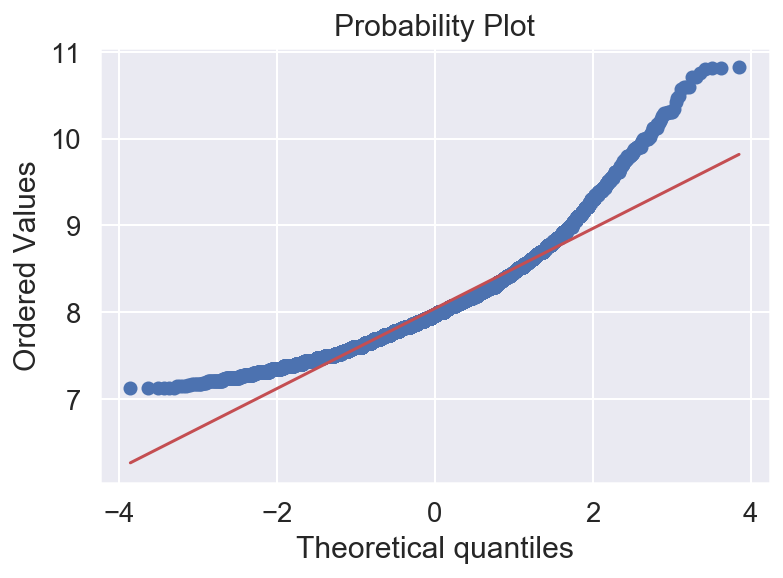

Skewness: 1.2518421547039238
Kurtosis: 2.7313240024610357


In [41]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["rent"] = np.log1p(train_df["rent"])

#Check the new distribution 
sns.distplot(train_df['rent'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['rent'])
print( f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent distribution')

fig = plt.figure()
res = stats.probplot(train_df['rent'], plot=plt)
plt.show()

#target_train = train_df.rent.values

print(f"Skewness: {train_df['rent'].skew()}")
print(f"Kurtosis: {train_df['rent'].kurt()}")

In [42]:
# split train and test sets

train = all_data_df[:ntrain_df]
test = all_data_df[ntrain_df:]

test.head(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,addr_lon,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
11970,#1B,18724,1.0,1.0,550.000000,167 MOTT STREET,New York,10013,40.719799,-73.996399,...,0,1,Little Italy,Manhattan,1B,1.00000,B,4,148.0,130.0
11971,#C4,403900,1.0,1.0,750.000000,107 LINDEN STREET,Brooklyn,11221,40.693118,-73.920035,...,0,1,Bushwick,Brooklyn,C4,4.00000,C,3,93.0,96.0
11972,#GARDEN,18175264,2.0,1.0,800.000000,47 CARROLL STREET,Brooklyn,11231,40.683399,-74.003998,...,0,0,Columbia St Waterfront District,Brooklyn,GARDEN,6.19794,A,3,112.0,123.0
11973,#2C,104863,2.0,2.0,1300.000000,952 COLUMBUS AVENUE,New York,10025,40.799900,-73.962799,...,0,1,Upper West Side,Manhattan,2C,2.00000,C,4,120.0,133.0
11974,#9,95125,2.0,1.0,750.000000,424 EAST 116 STREET,New York,10029,40.795350,-73.934597,...,0,0,East Harlem,Manhattan,9,6.19794,A,4,99.0,88.0
11975,#APT3F,13438,2.0,1.0,900.000000,98 RIVINGTON STREET,New York,10002,40.720258,-73.988409,...,0,0,Lower East Side,Manhattan,APT3F,3.00000,APTF,4,117.0,121.0
11976,#2,18748615,1.0,1.0,1914.000000,2308 WEST 7 STREET,Brooklyn,11223,40.591537,-73.977781,...,0,0,Gravesend,Brooklyn,2,6.19794,F,3,30.0,45.0
11977,#33C,54802,1.0,1.0,476.000000,520 WEST 43 STREET,New York,10036,40.760601,-73.996201,...,1,1,Midtown West,Manhattan,33C,33.00000,C,4,119.0,124.0
11978,#18,560236,2.0,1.0,985.369625,1051 OCEAN AVENUE,Brooklyn,11226,40.636826,-73.958140,...,0,1,Ditmas Park,Brooklyn,18,6.19794,B,3,68.0,68.0
11979,#C1,105784,4.0,1.0,1200.000000,920 AMSTERDAM AVENUE,New York,10025,40.800048,-73.966395,...,0,0,Upper West Side,Manhattan,C1,1.00000,C,4,120.0,133.0


In [43]:
# linear model

features = ['bedrooms','size_sqft','bathrooms','has_washer_dryer','has_doorman','floornumber',
            'has_concierge','has_gym','borough_encoded','addr_zip_encoded',
            'neighborhood_encoded']

X_train = train[features]
X_test = test[features]

X_train = X_train.fillna(X_train.median(), axis=0)
X_test = X_test.fillna(X_test.median(), axis=0)

lr = LinearRegression()

lr.fit(X_train,target_train)

test['predicted_rent'] = lr.predict(X_test)

print(lr.score(X_test,target_test))

print(MSE(target_test,test['predicted_rent']))


test['rent'] = target_test





0.639217855571469
2690411.8590478078


In [44]:
lr.coef_

array([-343.18013599,    4.07139364, 1215.69598416,  141.65643404,
        267.14268122,   25.31245654,  245.38138099,  170.70866794,
        246.16978419,   13.2322844 ,    5.73544782])

In [45]:
lr.intercept_

-4092.6124129705768

In [46]:
test[['predicted_rent','rent']].head(10)

,predicted_rent,rent
11970,2733.147838,2700
11971,2454.413283,1650
11972,2918.365019,2900
11973,6643.588853,4750
11974,2446.548316,1800
11975,3403.760541,3987
11976,6123.008983,3500
11977,3506.947113,3000
11978,2633.751155,2095
11979,3996.715674,4346


In [47]:
# random forest ensemble 

rf = RandomForestRegressor()

rf.fit(X_train,target_train)
test['predicted_rent_rf'] = rf.predict(X_test)

print(rf.score(X_test,target_test))

print(MSE(target_test,test['predicted_rent_rf']))


0.758873925561151
1798116.8420169237


In [48]:
# compare predicted rents between linear model and rf
test[['predicted_rent','rent','predicted_rent_rf']].head(10)

,predicted_rent,rent,predicted_rent_rf
11970,2733.147838,2700,2672.000000
11971,2454.413283,1650,2219.766667
11972,2918.365019,2900,2947.700000
11973,6643.588853,4750,5046.000000
11974,2446.548316,1800,2443.500000
11975,3403.760541,3987,3683.700000
11976,6123.008983,3500,3224.500000
11977,3506.947113,3000,3263.300000
11978,2633.751155,2095,2143.500000
11979,3996.715674,4346,5269.500000


In [49]:
# linear lasso regression

lasso = Lasso()

lasso.fit(X_train,target_train)

test['predicted_rent_lasso'] = lasso.predict(X_test)

print(lasso.score(X_test,target_test))

print(MSE(target_test,test['predicted_rent_lasso']))

0.6392130418936357
2690447.7554360535


In [50]:
#linear ridge regression

ridge = Ridge()

ridge.fit(X_train,target_train)

test['predicted_rent_ridge'] = ridge.predict(X_test)

print(ridge.score(X_test,target_test))

print(MSE(target_test,test['predicted_rent_ridge']))

0.6392241919673531
2690364.60750032


In [51]:
# random search hyper parameter tuning for random forest regressor before using grid search

from sklearn.model_selection import RandomizedSearchCV

# number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 10,stop = 50,num = 10)]

# maximum depth of each tree
max_depth = [int(x) for x in np.linspace(start=10,stop=110, num=11)]
max_depth.append(None)

# min number of samples required to split on a node
min_samples_split = [2,5,10]

# min number of samples per leaf before a split can occur
min_samples_leaf = [1,2,4]

# number of features to consider when splitting
max_features = ['auto','sqrt']

# if bootstrap sampling is used to train
bootstrap = [True,False]

randomf_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'bootstrap':bootstrap
               }



In [52]:
#intialize estimator
rfr = RandomForestRegressor()

rf_search = RandomizedSearchCV(estimator = rfr,param_distributions = randomf_grid,
                               n_iter=200,n_jobs = -1,cv=3,verbose=2,random_state=42)

# fit model
rf_search.fit(X_train,target_train)




Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [53]:
rf_search.best_params_

{'n_estimators': 41,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [54]:
test['rf_search_pred_rent'] = rf_search.predict(X_test)
test[['predicted_rent','rent','predicted_rent_rf','rf_search_pred_rent']]


,predicted_rent,rent,predicted_rent_rf,rf_search_pred_rent
11970,2733.147838,2700,2672.000000,2438.676829
11971,2454.413283,1650,2219.766667,2072.908537
11972,2918.365019,2900,2947.700000,3240.601626
11973,6643.588853,4750,5046.000000,5928.038618
11974,2446.548316,1800,2443.500000,2347.235772
...,...,...,...,...
13965,6038.247854,7155,5713.500000,6220.109756
13966,5611.239831,3200,3943.700000,3926.436992
13967,13259.459744,19500,15444.500000,15869.603659
13968,4184.077288,3510,3763.000000,3787.363821


In [55]:
rf_search.best_score_

0.868688893517384

In [56]:
rf_search.score(X_test,target_test)

0.7818182432004644

In [57]:
rf_search_results = pd.DataFrame(rf_search.cv_results_).sort_values(by='rank_test_score')
rf_search_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,0.713373,0.007365,0.046866,5.150430e-07,41,5,1,sqrt,70,False,"{'n_estimators': 41, 'min_samples_split': 5, '...",0.867602,0.865844,0.872621,0.868689,0.002871,1
32,0.458225,0.014727,0.026038,7.363897e-03,23,5,1,sqrt,100,False,"{'n_estimators': 23, 'min_samples_split': 5, '...",0.865024,0.864534,0.870802,0.866787,0.002846,2
11,0.519757,0.027862,0.031378,1.258982e-02,23,5,1,sqrt,90,False,"{'n_estimators': 23, 'min_samples_split': 5, '...",0.862737,0.861828,0.868297,0.864287,0.002859,3
54,0.551953,0.007364,0.031243,8.920806e-07,36,5,2,sqrt,None,False,"{'n_estimators': 36, 'min_samples_split': 5, '...",0.868086,0.855604,0.865759,0.863150,0.005420,4
6,0.569176,0.043773,0.031243,1.275455e-02,27,5,2,sqrt,100,False,"{'n_estimators': 27, 'min_samples_split': 5, '...",0.856751,0.862359,0.869223,0.862778,0.005100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2.041295,0.041002,0.046864,9.199649e-07,50,5,2,auto,20,False,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.787480,0.705345,0.774002,0.755609,0.035965,196
144,1.986314,0.076284,0.058641,8.494159e-03,45,5,2,auto,110,False,"{'n_estimators': 45, 'min_samples_split': 5, '...",0.786393,0.706350,0.773721,0.755488,0.035129,197
16,0.745464,0.015038,0.020829,7.363954e-03,18,5,2,auto,70,False,"{'n_estimators': 18, 'min_samples_split': 5, '...",0.785852,0.703266,0.774193,0.754437,0.036495,198
44,0.416943,0.014468,0.010415,7.364347e-03,10,5,2,auto,90,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.787019,0.700761,0.773737,0.753839,0.037921,199


In [58]:
pd.set_option('display.max_colwidth', -1)
rf_search_results['params'].head(10)

21     {'n_estimators': 41, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  
32     {'n_estimators': 23, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} 
11     {'n_estimators': 23, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}  
54     {'n_estimators': 36, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
6      {'n_estimators': 27, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} 
48     {'n_estimators': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  
68     {'n_estimators': 27, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False} 
7      {'n_estimators': 18, 'min_s

In [59]:
# grid search to find the optimal hyper parameterss
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[20,30,40,50],
               'max_depth':[70,80,90,100,110],
               'min_samples_split':[5,10,12],
               'min_samples_leaf':[1,2],
               'max_features':[3,4,5,'auto'],
               'bootstrap':[False]
               }

rfr_gs = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfr_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,target_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False],
           

In [60]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 40}

In [61]:
gs_results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score',ascending=False)
gs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
218,0.982562,0.037389,0.049609,0.002088,False,90,4,1,5,40,"{'bootstrap': False, 'max_depth': 90, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}",0.872074,0.867395,0.866233,0.868567,0.002525,1
314,0.882342,0.015472,0.047640,0.006586,False,100,4,1,5,40,"{'bootstrap': False, 'max_depth': 100, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}",0.870509,0.865596,0.867524,0.867876,0.002021,2
122,1.024441,0.050467,0.050006,0.016748,False,80,4,1,5,40,"{'bootstrap': False, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}",0.871391,0.863523,0.868000,0.867638,0.003222,3
411,1.073472,0.008732,0.053445,0.006609,False,110,4,1,5,50,"{'bootstrap': False, 'max_depth': 110, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}",0.864590,0.862811,0.874306,0.867235,0.005052,4
126,0.708601,0.012775,0.031247,0.000007,False,80,4,1,10,40,"{'bootstrap': False, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}",0.869914,0.862890,0.868352,0.867052,0.003011,5


In [62]:
best_est = grid_search.best_estimator_

best_pred = best_est.predict(X_test)

MSE(target_test,best_pred)

1567221.3077318415

In [63]:
# transform target variable for better predictions

from sklearn.compose import TransformedTargetRegressor

rf_trans = TransformedTargetRegressor(regressor = best_est,func = np.log1p, inverse_func = np.expm1)
rf_trans.fit(X_train,target_train)
rf_trans_pred = rf_trans.predict(X_test)

MSE(target_test,rf_trans_pred)

1679562.1361387384

In [64]:
rf_trans.score(X_test,target_test)

0.7747720197042401

In [252]:
# import Submission data set


submission_df = pd.read_csv('Datasets/SE_rents2018_test2.csv')

submission_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7428577,#4F,159457,0,1.0,450.0,2018-08-01 08:10:01,162 SMITH STREET,Brooklyn,11201,...,0,0,NaN,0,"Large studio with high ceilings, plenty of natural light all day, central air and dog friendly! The last of the affordable studios left in Boerum Hill, centrally located near all the shops, restaurants, entertainment and transportation. On the 4th floor in a walk-up; so 3 flights. About 450 square feet. Smith Street is right on top of the F & G trains. This is one of few buildings that will take dogs! (Several excellent veterinarians in neighborhood.) Near glorious Brooklyn Bridge Park. No laundry in the building but there is a drop off across the street. CitiBike kiosks everywhere so you don't have to own hour own (or lug it upstairs). Available for move in before the 1st of Septmeber. Non-smoking building. My fee is only one month's rent.",Cobble Hill,Brooklyn,4F,4.0,F
1,7454944,NaN,1579540,2,1.0,950.0,2018-08-08 08:01:59,21-22 CLINTONVILLE STREET,Whitestone,11357,...,0,0,NaN,0,"Beautifully Renovated Second Floor Unit. Kitchen Updated With Granite And Stainless Appliances. Two Generously Sized Light Filled Bedrooms. Updated Bathroom With Skylight. Wood Floors Throughout. Three In Wall A/C's. Convenient To Shopping, Highways And Public Transportation. Qm2 To Nyc, Q16 & Q76 Nearby.",Whitestone,Queens,NaN,NaN,NaN
2,7473595,#1D,64873,1,1.0,0.0,2018-08-14 08:04:27,676 AMSTERDAM AVENUE,New York,10025,...,0,0,NaN,1,"MID SEPT MOVE-IN NO fee! $2895\r\nIf you are looking for a large 1 bed, non-cookie cutter type apt, this place is it!\r\n16ft ceilings with recessed lighting. The super is awesome and very tall, so he can probably help you replace the lightbulbs :) \r\nKING-SIZED BEDROOM. The living room is so big you can fit all of your family, friends pets and furniture. \r\nRenovated open kitchen with breakfast bar.\r\nPART-TIME DRM, LAUNDRY, ELEVATOR, BIKE ROOM. Steps to the express trains and Pinkberry :)",Upper West Side,Manhattan,1D,1.0,D
3,7490488,#5C,546541,2,1.0,500.0,2018-08-19 01:19:00,56 EAST 21 STREET,Brooklyn,11226,...,0,0,NaN,1,"Here at Kenmore Place, beautifully curated apartments display a striking color palette expertly incorporating light and dark. Floor-to-ceiling windows, recessed lighting, and wide plank wood flooring create an expansive atmosphere.\r\n\r\nContemporary kitchens feature high-end stainless steel appliances by Summit, floating cabinets with under-cabinet lighting, sleek midnight black backsplashes and wall tiling, and matte black fixtures. Soothing bathrooms capture the perfect balance of style and convenience. Modern fixtures include custom mirrors, bathtubs by Maax, Brizo shower heads, and chic wall-mounted vanities by Badeloft.\r\n\r\nResidences also offer the convenience of split units for A/C and heat, and video intercoms. This home boasts a balcony accessible from both bedrooms. 62 East 21st Street enjoys a thoughtfully curated amenity package, designed to enhance comfort and convenience, as well as reduce costs of a gym membership. A lounge and common roof deck offer aesthetically appealing settings for relaxation and entertainment. Additional amenities include a fitness center, common laundry room, and bike storage.\r\n\r\nFor all of your apartment needs, contact Matthew, as he has access to a variety of offerings and doesn't charge a broker's fee.",Flatbush,Brooklyn,5C,5.0,C
4,7460896,#11G,10678,1,1.0,610.0,2018-08-09 14:05:52,101 AVENUE D,New York,10009,...,1,0,NaN,1,"STUNNING ONE BEDROOM WITH PRIVATE BALCONY. Features include Condo-like Finishes, Abundant Storage, Open Kitchen, Top-of-the-line Stainless Steel Appliances, Bamboo Flooring, Over-Sized Windows and Caesarstone Countertops. The Arabella 101 is the Premier Boutique LUXURY rental building in the heart of the East Village with L

In [253]:
# drop unecessary columns 
submission_df.drop(["rent","created_at",'description','bin'],axis=1,inplace=True)

In [254]:
# size_sqft = 0 to nan

submission_df.loc[submission_df['size_sqft']==0,'size_sqft'] = np.nan

In [255]:
# bathrooms = 0 to nan
submission_df.loc[submission_df['bathrooms']==0,'bathrooms'] = np.nan

In [256]:
# bedrooms = 0 to nan
submission_df.loc[submission_df['bedrooms']==0,'bedrooms'] = np.nan

In [257]:
# Find NaN Ratio of Dataset

submission_na = (submission_df.isnull().sum() / len(submission_df)) * 100
submission_na = submission_na.drop(submission_na[submission_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':submission_na})
missing_data

,Missing Ratio
line,30.60
floornumber,13.15
bedrooms,12.65
size_sqft,8.85
year_built,4.10
unit,1.45
addr_unit,1.45
min_to_subway,0.80
neighborhood,0.05
bathrooms,0.05


Text(0.5, 1.0, 'Percent missing data by feature')

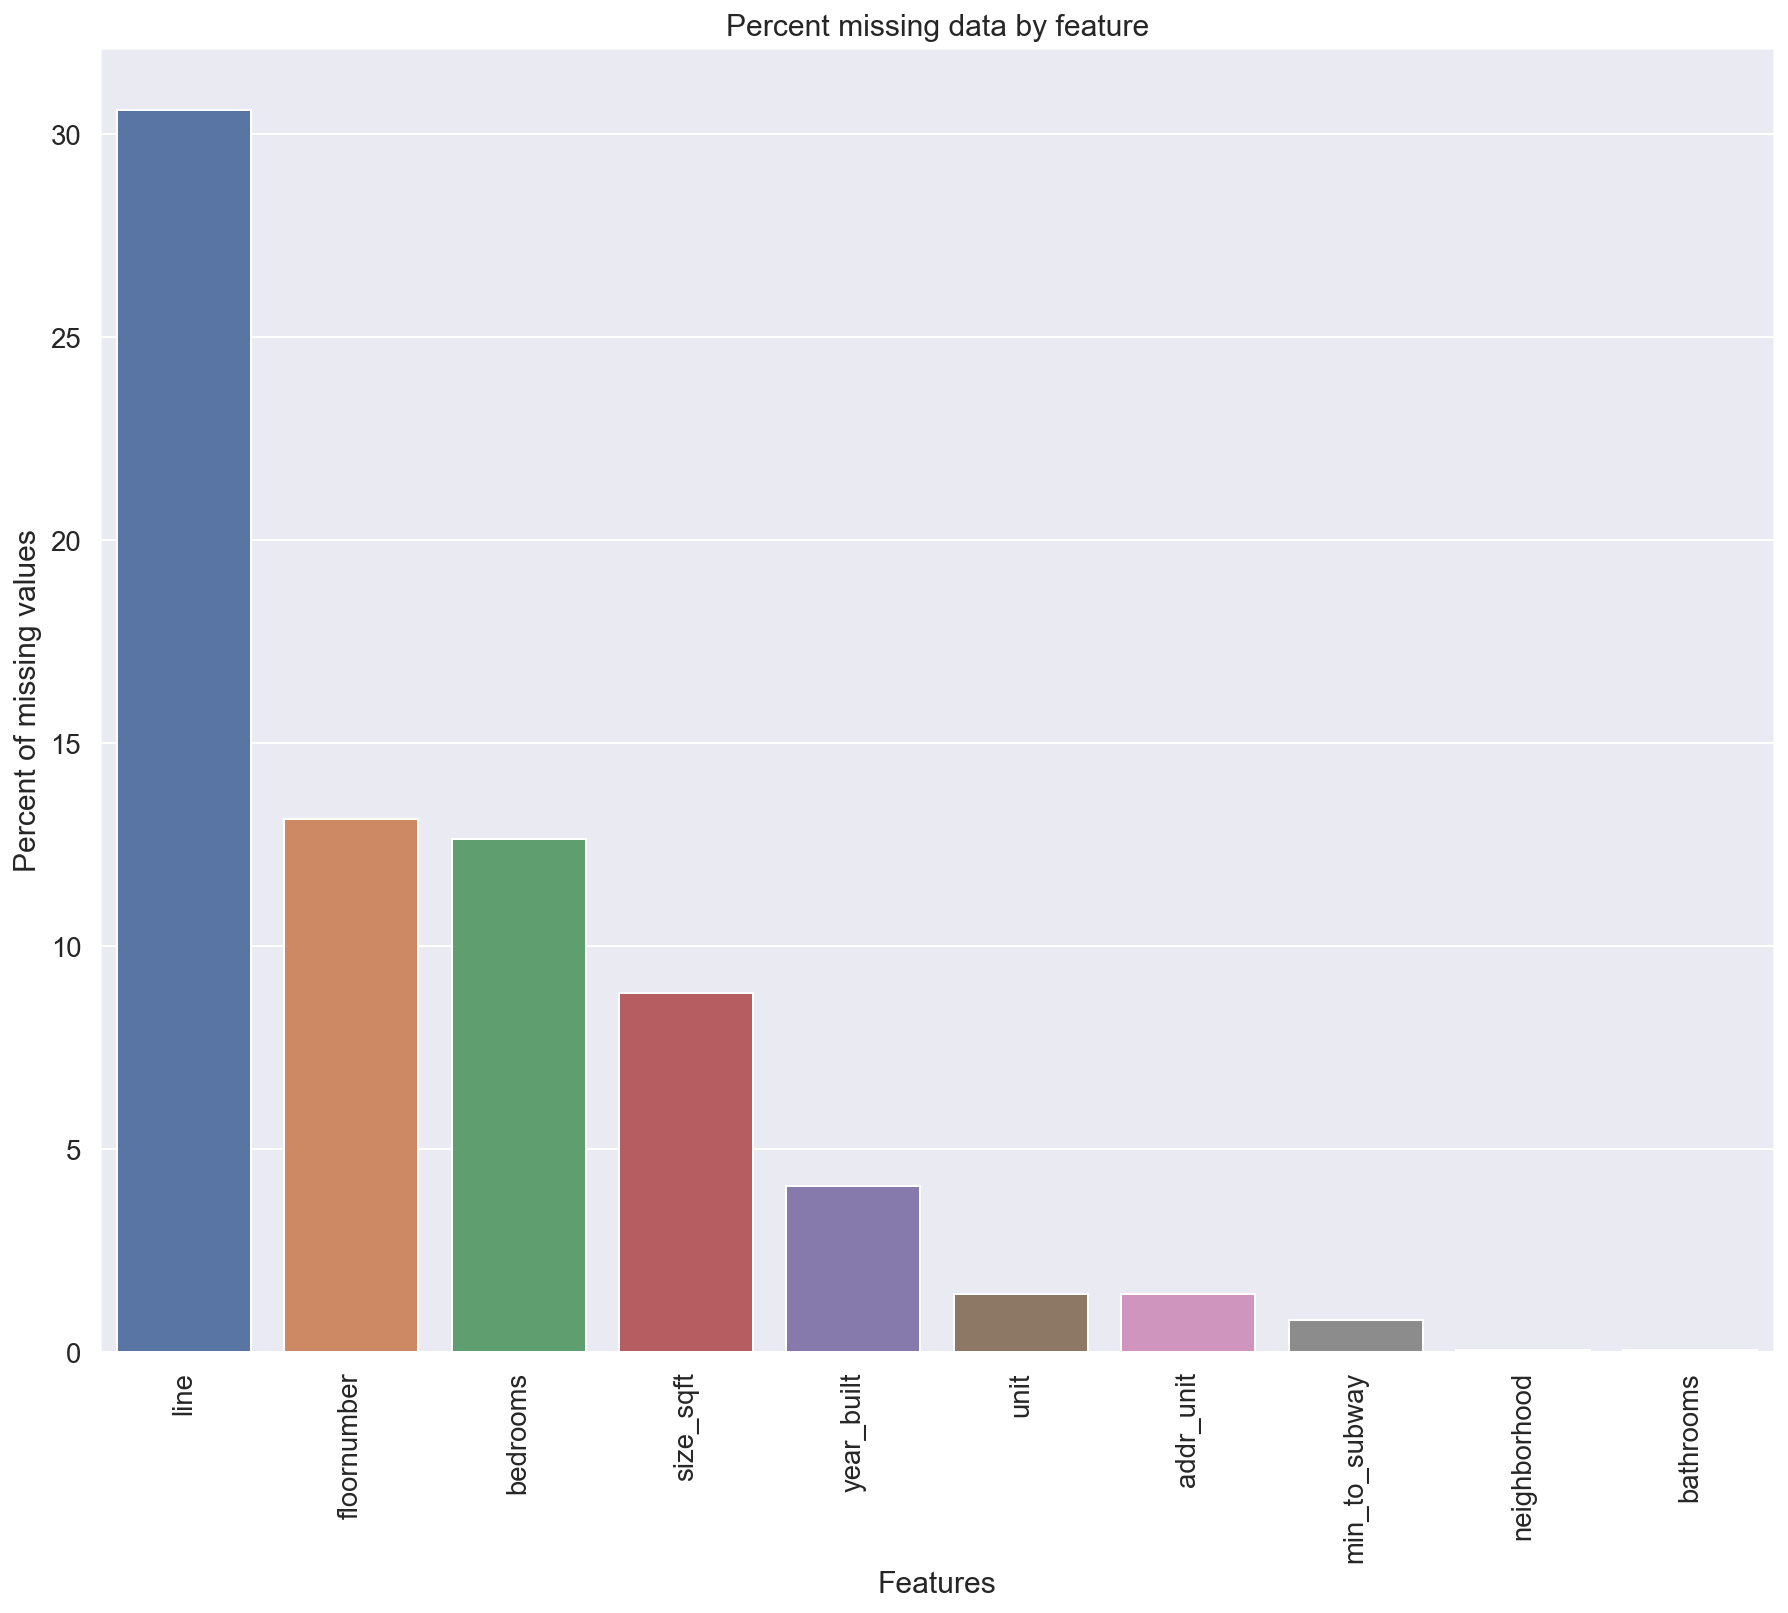

In [258]:
# Percent missing data by feature

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=submission_na.index, y=submission_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [259]:
# impute missing line values using zipcode and most frequent line in that area
submission_df['line'] = submission_df.groupby('addr_zip')['line'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))

#impute missing bedroom values with 1 as they were all 0 before 
submission_df['bedrooms'].fillna(1,inplace=True)

#impute floornumber missing values with mean floornumber
submission_df['floornumber'].fillna(submission_df['floornumber'].mean(),inplace=True)
submission_df['floornumber'].round(0)

#impute size_sqft missing values with mean size of # of bedrooms
submission_df['size_sqft'] = submission_df.groupby('bedrooms')['size_sqft'].transform(lambda x: x.fillna(x.mean()))

#impute year_built missing values with year_built mean of addr_zipcode
submission_df['year_built'] = submission_df.groupby('addr_zip')['year_built'].transform(lambda x: x.fillna(x.mean()))

#impute min_to_subway missing values with mean of addr_zipcode
submission_df['min_to_subway'] = submission_df.groupby('addr_zip')['min_to_subway'].transform(lambda x: x.fillna(x.mean()))

#impute unit missing values with column mean
submission_df['unit'].fillna(submission_df['unit'].mode()[0],inplace=True)

#impute addr_unit missing values with column mean
submission_df['addr_unit'].fillna(submission_df['addr_unit'].mode()[0],inplace=True)

#impute bathrooms missing values with 1 as they were 0 before
submission_df['bathrooms'].fillna(1,inplace=True)

#impute neighborhood missing values with addr_zip mode
submission_df['neighborhood'] = submission_df.groupby('addr_zip')['neighborhood'].transform(lambda x: x.fillna(stats.mode(x).mode[0]))



In [260]:
#Check if there are any missing values left

submission_na = (submission_df.isnull().sum() / len(submission_df)) * 100
submission_na = submission_na.drop(submission_na[submission_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [261]:
# feature transoforming borough

print(submission_df['borough'].describe())
print(f"\n{submission_df['borough'].value_counts()}")
borough_rank_dic = {"Staten Island": 0,
                   "Bronx":1,
                   "Queens":2,
                   "Brooklyn":3,
                   "Manhattan":4}

submission_df.groupby('borough').count()

submission_df['borough_encoded'] = submission_df['borough'].map(borough_rank_dic)




count     2000     
unique    5        
top       Manhattan
freq      877      
Name: borough, dtype: object

Manhattan        877
Brooklyn         786
Queens           298
Bronx            35 
Staten Island    4  
Name: borough, dtype: int64


In [264]:
# feature transforming addr zip

print(submission_df['addr_zip'].describe())

submission_df['addr_zip_encoded'] = submission_df['addr_zip'].map(addr_zip_rank_dic)



count    2000.000000 
mean     10684.993500
std      589.143729  
min      10001.000000
25%      10023.000000
50%      11103.000000
75%      11217.000000
max      11693.000000
Name: addr_zip, dtype: float64


In [265]:
# imputing unknown values in addr_zip_encoded

bor_encoded_avg = submission_df.groupby('borough')['addr_zip_encoded'].mean().round(0).to_dict()

def impute_unknown(rental_id):
    submission_df.loc[submission_df['rental_id'] == rental_id,'addr_zip_encoded'] = bor_encoded_avg[submission_df.loc[submission_df['rental_id'] == rental_id,'borough'].values[0]] 

submission_df[submission_df['addr_zip_encoded'].isnull()]['rental_id'].transform(lambda x: impute_unknown(x))

submission_df[submission_df['addr_zip_encoded'].isnull()]



,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_garden,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded


In [268]:
# feature transforming neighborhoods

print(submission_df['neighborhood'].describe())

submission_df['neighborhood_encoded'] = submission_df['neighborhood'].map(neighborhood_rank_dic)

submission_df[submission_df['neighborhood_encoded'].isnull()]

count     2000           
unique    121            
top       Upper West Side
freq      144            
Name: neighborhood, dtype: object


,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded
156,7497094,#2,1218613,3.0,1.0,1100.0,253 HUNTINGTON AVENUE,Bronx,10465,40.815731,...,0,0,Throgs Neck,Bronx,2,2.000000,0,1,42.0,NaN
789,7490203,#2,767881,3.0,1.0,1200.0,3815 OCEAN VIEW AVENUE,Brooklyn,11224,40.580617,...,0,1,Seagate,Brooklyn,2,2.000000,C,3,63.0,NaN
921,7435054,#BSMT,2105545,1.0,1.0,400.0,136-11 220 STREET,Springfield Gardens,11413,40.676232,...,0,0,Laurelton,Queens,BSMT,6.048647,0,2,62.0,NaN
1103,7442641,#APT1,18741022,1.0,1.0,700.0,133 ELSON STREET,Staten Island,10314,40.615398,...,0,0,Graniteville,Staten Island,APT1,1.000000,APT,0,46.0,NaN
1242,7442653,#APT1,18741019,1.0,1.0,700.0,131 ELSON STREET,Staten Island,10314,40.615501,...,0,0,Graniteville,Staten Island,APT1,1.000000,APT,0,46.0,NaN
1338,7521247,#2,942517,3.0,1.0,1000.0,2705 EAST 65 STREET,Brooklyn,11234,40.606373,...,0,0,Mill Basin,Brooklyn,2,2.000000,0,3,61.0,NaN
1788,7436953,#2,2122417,3.0,2.0,1250.0,146-21 230 PLACE,Springfield Gardens,11413,40.658647,...,0,0,Brookville,Queens,2,2.000000,0,2,62.0,NaN


In [269]:
# impute unknown neighborhoods

neigh_encoded_avg = submission_df.groupby('borough')['neighborhood_encoded'].mean().round(0).to_dict()

def impute_un(rental_id):
    submission_df.loc[submission_df['rental_id'] == rental_id,'neighborhood_encoded'] = neigh_encoded_avg[submission_df.loc[submission_df['rental_id'] == rental_id,'borough'].values[0]] 
    
submission_df[submission_df['neighborhood_encoded'].isnull()]['rental_id'].transform(lambda x: impute_un(x))

submission_df[submission_df['neighborhood_encoded'].isnull()]


,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,addr_street,addr_city,addr_zip,addr_lat,...,has_childrens_playroom,no_fee,neighborhood,borough,unit,floornumber,line,borough_encoded,addr_zip_encoded,neighborhood_encoded


In [280]:
# predict test2 and create submission df

test_features = submission_df[features]

submission_df['rent'] = best_est.predict(test_features)

submission_df[['rental_id','rent']].sample(40)

,rental_id,rent
1536,7472710,3156.343750
483,7496686,3056.285417
327,7488217,2878.220833
1459,7429876,2193.368750
1716,7503208,10413.166667
339,7492177,5299.929167
873,7432765,4688.935417
985,7459207,1554.070833
213,7511620,4953.345833
1392,7490671,4156.775000
